# <center>Womens Premier League Auction 2023 Analysis</a></center>

<a id="top"></a>
# Table of Contents

- [1. Introduction](#1)
- [2. Reading the Dataset](#2)
- [3. High Level Analysis](#3)
- [4. Team Wise Analysis](#4)

<a id="1"></a>
# <center>Introduction</center>

- In this notebook we will analyze the Womens Premier League Auction 2023 dataset.
- This is a high level introductory notebook for [Women's Premier League Auction (2023)](https://www.kaggle.com/datasets/pardeep19singh/womens-premier-leaguewpl-auction-2023) dataset.

So lets get started 🚀

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from tqdm import tqdm
import math

sns.set()
%matplotlib inline
warnings.filterwarnings(action='ignore')

import matplotlib as mpl
import matplotlib.cm as cmap
import matplotlib.colors as mpl_colors

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

def hex_to_rgb(h):
    h = h.lstrip('#')
    return tuple(int(h[i:i+2], 16)/255 for i in (0, 2, 4))

palette = ['#2E765E', '#1d4a60', '#5DD9FB', '#568f8b', '#B6E5D8', '#cd7e59', '#BE0C3D', '#ddb247', '#d15252', '#b4d2b1',]
palette_rgb = [hex_to_rgb(x) for x in palette]
cmap = mpl_colors.ListedColormap(palette_rgb)
colors = cmap.colors
bg_color = '#EFEAE0'

custom_params = {
    "axes.spines.right": False,
    "axes.spines.top": False,
    'grid.alpha':0.3,
    'figure.figsize': (16, 6),
    'axes.titlesize': 'Large',
    'axes.labelsize': 'Large',
    'figure.facecolor': bg_color,
    'axes.facecolor': bg_color
}

sns.set_theme(
    style='whitegrid',
    palette=sns.color_palette(palette),
    rc=custom_params
)

warnings.simplefilter("ignore", UserWarning)

<a id="2"></a>
# <center>Reading the dataset</center>

In [2]:
DIR_PATH = '/kaggle/input/womens-premier-leaguewpl-auction-2023'
auction_df = pd.read_csv(f'{DIR_PATH}/auction_2023.csv')
players_info_df = pd.read_csv(f'{DIR_PATH}/players_info_2023.csv')
display(auction_df.head())
display(players_info_df.head())

,Player,National Side,Team,Price,Price (₹),Price (US$)
0,Smriti Mandhana,India,Royal Challengers Bangalore,"₹3.4 crore (US$430,000)",₹3.4 crore,430000
1,Harmanpreet Kaur,India,Mumbai Indians,"₹1.8 crore (US$230,000)",₹1.8 crore,230000
2,Sophie Devine,New Zealand,Royal Challengers Bangalore,"₹50 lakh (US$63,000)",₹50 lakh,63000
3,Ashleigh Gardner,Australia,Gujarat Giants,"₹3.2 crore (US$400,000)",₹3.2 crore,400000
4,Ellyse Perry,Australia,Royal Challengers Bangalore,"₹1.7 crore (US$210,000)",₹1.7 crore,210000


,Team,Player,Role,Full Name,Born,Age,National Side,Batting Style,Bowling,Teams Played
0,Up Warriorz,Shabnim Ismail,Bowler,Shabnim Ismail,"October 5, 1988 Cape Town, Cape Province","34 Years, 4 Months, 22 Days",South Africa,Left Handed,Right-arm fast medium,"South Africa Women, Melbourne Renegades Women,..."
1,Up Warriorz,Rajeshwari Gayakwad,Bowler,Rajeshwari Shivanand Gayakwad,"June 1, 1991 Bijapur, Karnataka","31 Years, 8 Months, 25 Days",India,Right Handed,Slow left-arm orthodox,"India Women, Karnataka, Supernovas, Trailblaze..."
2,Up Warriorz,Deepti Sharma,Bowler,Deepti Bhagwan Sharma,"August 24, 1997 Saharanpur, Uttar Pradesh","25 Years, 6 Months, 3 Days",India,Left Handed,Off break,"India Women, Trailblazers, Western Storm, Indi..."
3,Up Warriorz,Shweta Sehrawat,Bowler,Shweta Sanjay Sehrawat,"May 10, 2006 Bulandshahr, Uttar Pradesh","18 Years, 11 Months, 30 Days",India,Right Handed,Offbreak,"Delhi Women, India A Women Under-19, India B W..."
4,Up Warriorz,Parshavi Chopra,All Rounder,Parshavi Chopra,"February 26, 2004 Delhi, Delhi","16 Years, 9 Months, 15 Days",India,Right Handed,Leg break,"India A Women Under-19, India Women Under-19"


In [3]:
display(auction_df.info())
display(players_info_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Player         87 non-null     object
 1   National Side  87 non-null     object
 2   Team           87 non-null     object
 3   Price          87 non-null     object
 4   Price (₹)      87 non-null     object
 5   Price (US$)    87 non-null     int64 
dtypes: int64(1), object(5)
memory usage: 4.2+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Team           87 non-null     object
 1   Player         87 non-null     object
 2   Role           87 non-null     object
 3   Full Name      87 non-null     object
 4   Born           87 non-null     object
 5   Age            87 non-null     object
 6   National Side  87 non-null     object
 7   Batting Style  87 non-null     object
 8   Bowling        87 non-null     object
 9   Teams Played   87 non-null     object
dtypes: object(10)
memory usage: 6.9+ KB


None

In [4]:
# Extract Age in Years from Age column. Split value in Age column by Years, keyword and take the first value.
players_info_df['Age(Years)'] = players_info_df['Age'].apply(lambda x: x.split('Years')[0].strip() if 'Years' in x else x.split('years')[0].strip()).astype(int)
players_info_df['Age(Years)'].value_counts()

25    11
29     7
26     6
22     6
30     6
23     5
27     5
31     5
20     4
33     4
32     4
24     4
19     4
34     3
28     3
18     3
15     2
16     2
21     2
17     1
Name: Age(Years), dtype: int64

In [5]:
players_info_df.drop(columns=['Team', 'National Side'], inplace=True)
auction_df = auction_df.merge(players_info_df, on='Player', how='left')
display(auction_df.head())

,Player,National Side,Team,Price,Price (₹),Price (US$),Role,Full Name,Born,Age,Batting Style,Bowling,Teams Played,Age(Years)
0,Smriti Mandhana,India,Royal Challengers Bangalore,"₹3.4 crore (US$430,000)",₹3.4 crore,430000,Batsman,Smriti Shriniwas Mandhana,"July 18, 1996 Mumbai, Maharashtra","26 Years, 7 Months, 9 Days",Left Handed,Off break,"India Women, Brisbane Heat Women, Hobart Hurri...",26
1,Harmanpreet Kaur,India,Mumbai Indians,"₹1.8 crore (US$230,000)",₹1.8 crore,230000,Batsman,Harmanpreet Kaur Bhullar,"March 8, 1989 Punjab","33 Years, 11 Months, 19 Days",Right Handed,Off break,"India Women, Sydney Thunder Women, Supernovas,...",33
2,Sophie Devine,New Zealand,Royal Challengers Bangalore,"₹50 lakh (US$63,000)",₹50 lakh,63000,All Rounder,Sophie Frances Monique Devine,"September 1, 1989 Wellington","33 Years, 5 Months, 25 Days",Right Handed,Right-arm medium,"New Zealand Women, Adelaide Strikers Women, Su...",33
3,Ashleigh Gardner,Australia,Gujarat Giants,"₹3.2 crore (US$400,000)",₹3.2 crore,400000,All Rounder,Ashleigh Katherine Gardner,"April 15, 1997 Bankstown, Sydney, New South Wales","25 Years, 10 Months, 11 Days",Right Handed,Off break,"Australia Women, Sydney Sixers Women, New Sout...",25
4,Ellyse Perry,Australia,Royal Challengers Bangalore,"₹1.7 crore (US$210,000)",₹1.7 crore,210000,Bowler,Ellyse Alexandra Perry,"November 3, 1990 Wahroonga, Sydney, New South ...","32 Years, 3 Months, 23 Days",Right Handed,Right-arm fast medium,"Australia Women, Sydney Sixers Women, Supernov...",32


<a href="#top" role="button" aria-pressed="true" >⬆️ Back to Table of Contents ⬆️</a>

<a id="3"></a>
# <center>High Level Analysis</center>
### <center>Team Wise Analysis</center>

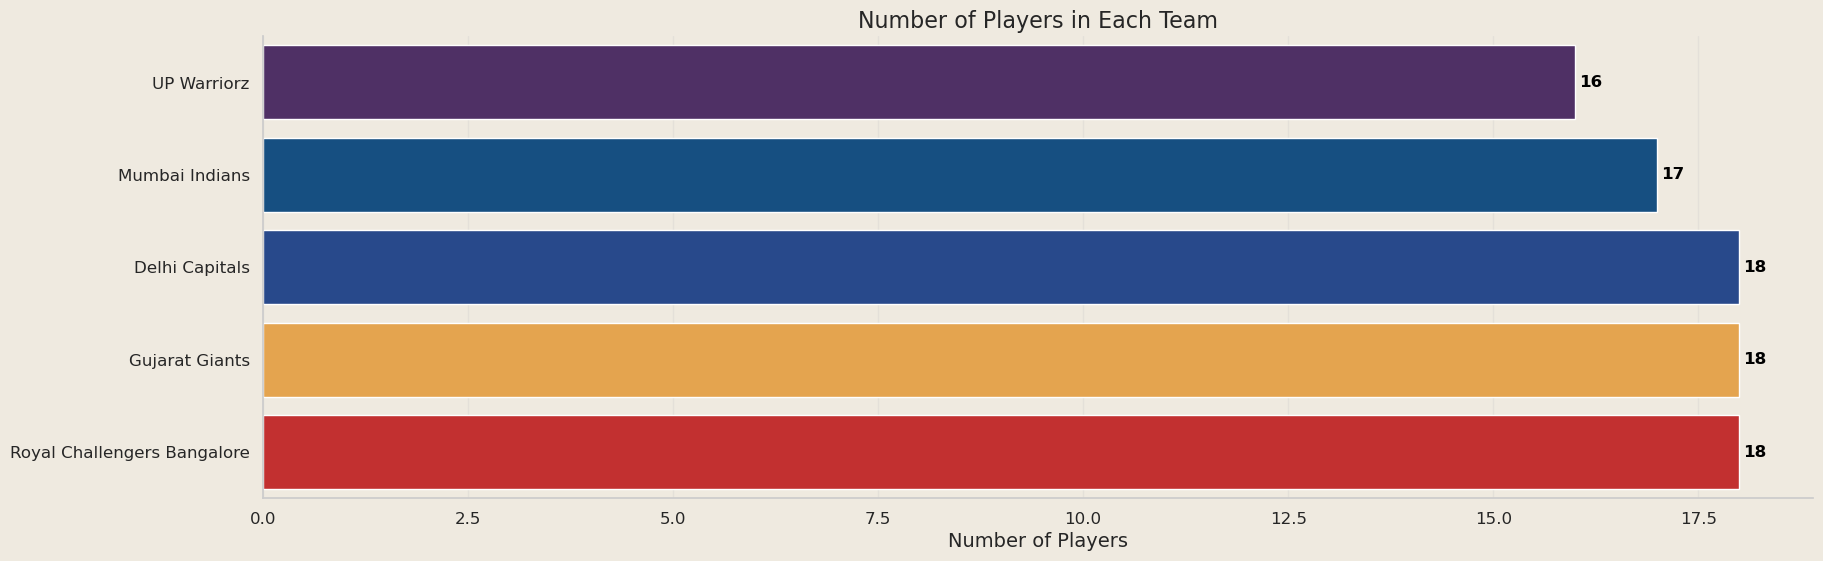

In [6]:
team_specific_palette = {
    'UP Warriorz': '#50276E',
    'Mumbai Indians': '#045093',
    'Delhi Capitals': '#17449B',
    'Gujarat Giants': '#FDA736',
    'Royal Challengers Bangalore': '#DA1818'
}

fig = plt.figure(figsize=(20, 6))

players_per_team = auction_df.groupby('Team')['Player'].count().reset_index().sort_values(by='Player', ascending=True)

ax = sns.barplot(y='Team', x='Player', data=players_per_team, palette=team_specific_palette)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=12, color='black', padding=3, weight='bold')
plt.title('Number of Players in Each Team', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('')
plt.xlabel('Number of Players', fontsize=14)
plt.show();

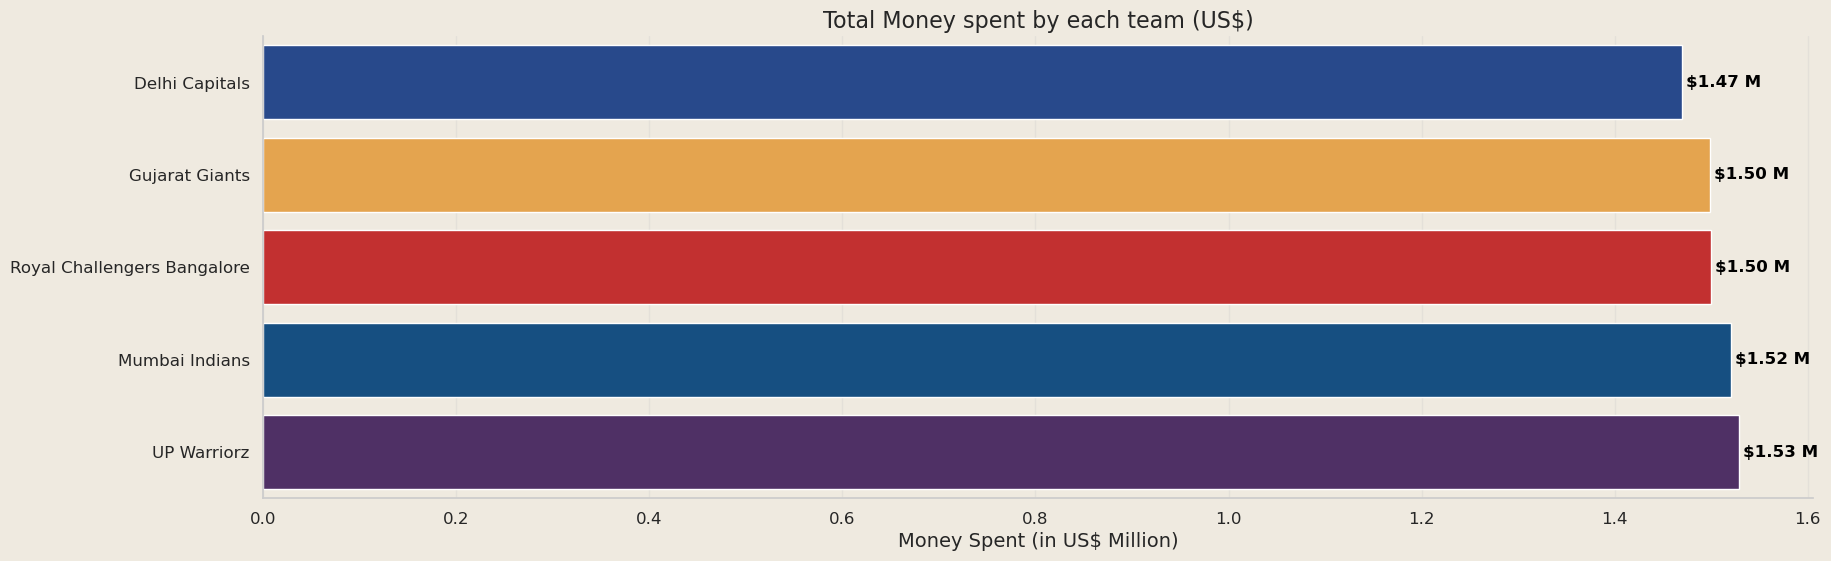

In [7]:
fig = plt.figure(figsize=(20, 6))

money_spent_by_each_team = auction_df.groupby('Team')['Price (US$)'].sum().reset_index().sort_values(by='Price (US$)', ascending=True)
money_spent_by_each_team['Price (US$)'] = money_spent_by_each_team['Price (US$)'] / 1000000
money_spent_by_each_team['Price (US$) Label'] = money_spent_by_each_team['Price (US$)'].apply(lambda x: f'${x:.2f} M')

ax = sns.barplot(y='Team', x='Price (US$)', data=money_spent_by_each_team, palette=team_specific_palette)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=12, color='black', padding=3, weight='bold', labels=money_spent_by_each_team['Price (US$) Label'])
plt.title('Total Money spent by each team (US$)', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('')
plt.xlabel('Money Spent (in US$ Million)', fontsize=14)
plt.show();

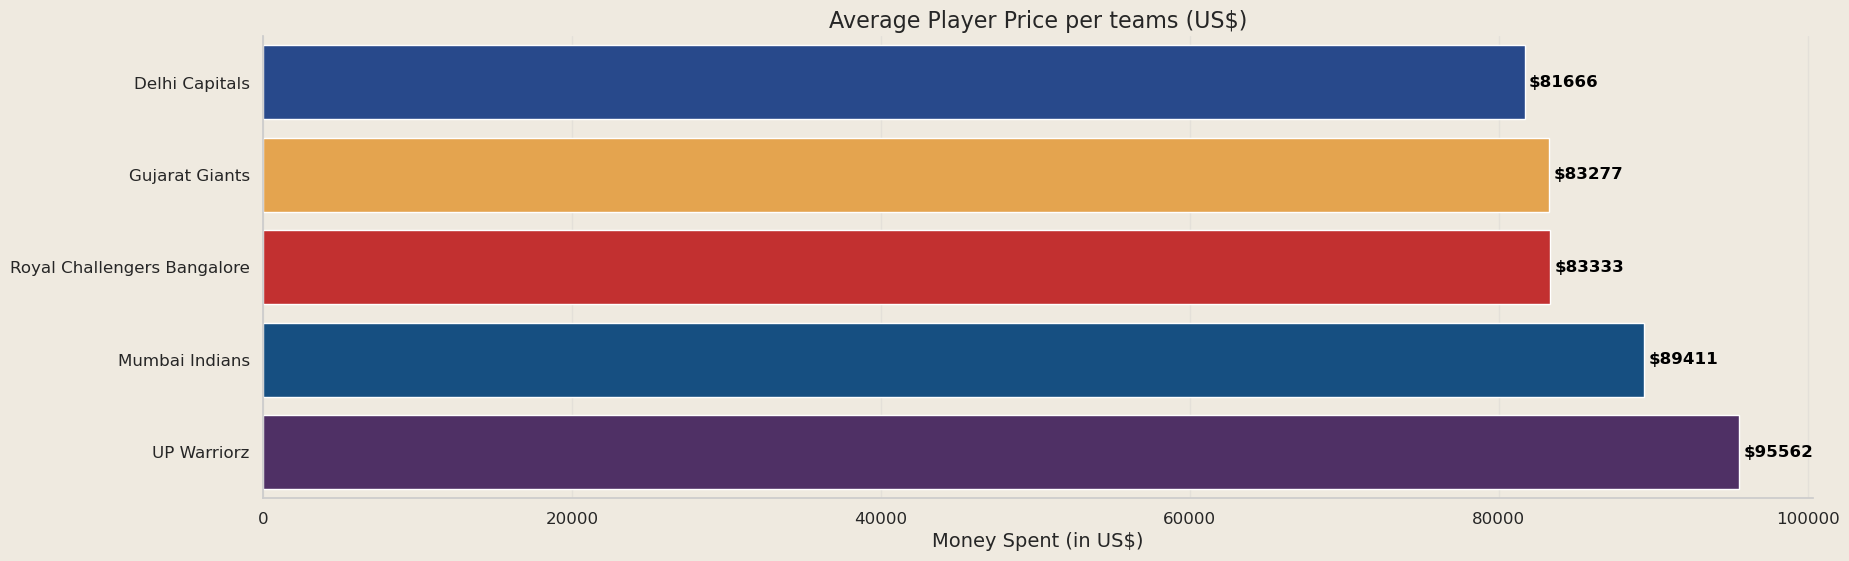

In [8]:
average_cost_per_player_by_each_team = auction_df.groupby('Team')['Price (US$)'].mean().reset_index().sort_values(by='Price (US$)', ascending=True)
average_cost_per_player_by_each_team['Price (US$)'] = average_cost_per_player_by_each_team['Price (US$)'].astype(int)
average_cost_per_player_by_each_team['Price (US$) Label'] = average_cost_per_player_by_each_team['Price (US$)'].apply(lambda x: f'${x}')

fig = plt.figure(figsize=(20, 6))
ax = sns.barplot(y='Team', x='Price (US$)', data=average_cost_per_player_by_each_team, palette=team_specific_palette)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=12, color='black', padding=3, weight='bold', labels=average_cost_per_player_by_each_team['Price (US$) Label'])
plt.title('Average Player Price per teams (US$)', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('')
plt.xlabel('Money Spent (in US$)', fontsize=14)
plt.show();

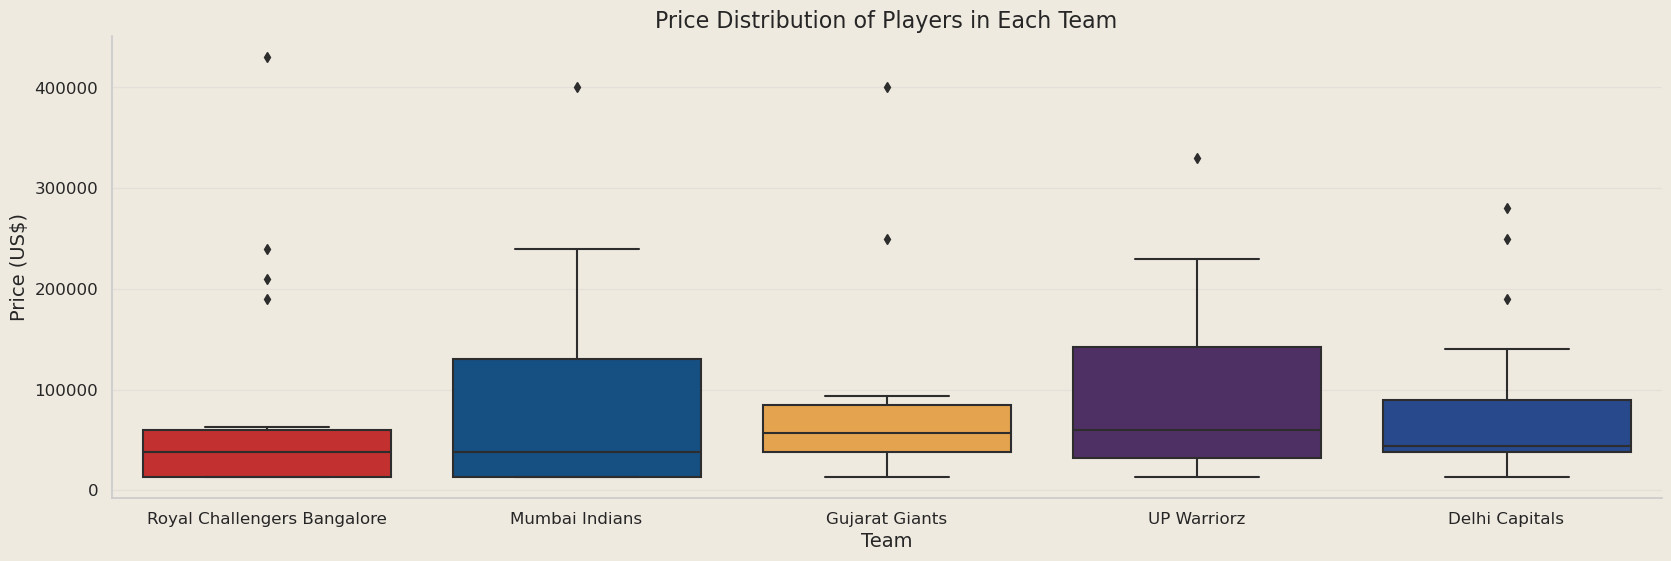

In [9]:
fig = plt.figure(figsize=(20, 6))

ax = sns.boxplot(x='Team', y='Price (US$)', data=auction_df, palette=team_specific_palette)
plt.title('Price Distribution of Players in Each Team', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Price (US$)', fontsize=14)
plt.xlabel('Team', fontsize=14)
plt.show();

<div class="alert alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">

📌&nbsp;<u><b>Insights:</b></u>
 
<li>5 teams participated in this auction to buy 87 players</li><br>
<li>UP Warriorz spent the most money(&#36;153M) and bought the minimum number of players(16).</li><br>
<li>Average price of players bought by UP Warriorz is the highest(&#36;95562).</li><br>
<li>Highest bid came from RCB which was for over &#36;400K.</li><br>
</div>

<br>

<a href="#top" role="button" aria-pressed="true" >⬆️ Back to Table of Contents ⬆️</a>

### <center>National Side Analysis</center>

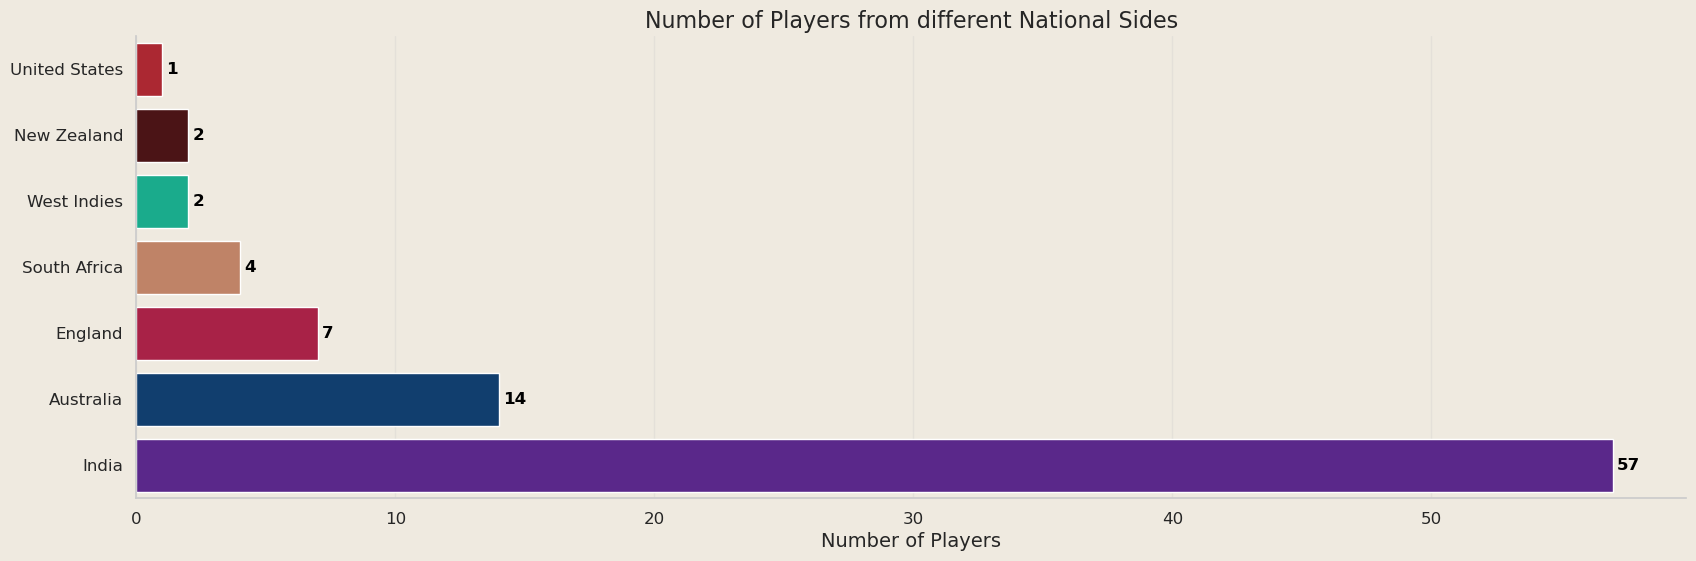

In [10]:
national_side_palette = ['#c1121f', '#540b0e', '#02c39a', '#cd7e59', '#BE0C3D', '#023e7d', '#5a189a', '#b4d2b1',]
players_per_national_side = auction_df.groupby('National Side')['Player'].count().reset_index().sort_values(by='Player', ascending=True)
national_side_palettes = {
    team:color for team, color in zip(players_per_national_side['National Side'].values, national_side_palette)
}

fig = plt.figure(figsize=(20, 6))
ax = sns.barplot(y='National Side', x='Player', data=players_per_national_side, palette=national_side_palettes)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=12, color='black', padding=3, weight='bold')
plt.title('Number of Players from different National Sides', fontsize=16)    
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('')
plt.xlabel('Number of Players', fontsize=14)
plt.show();

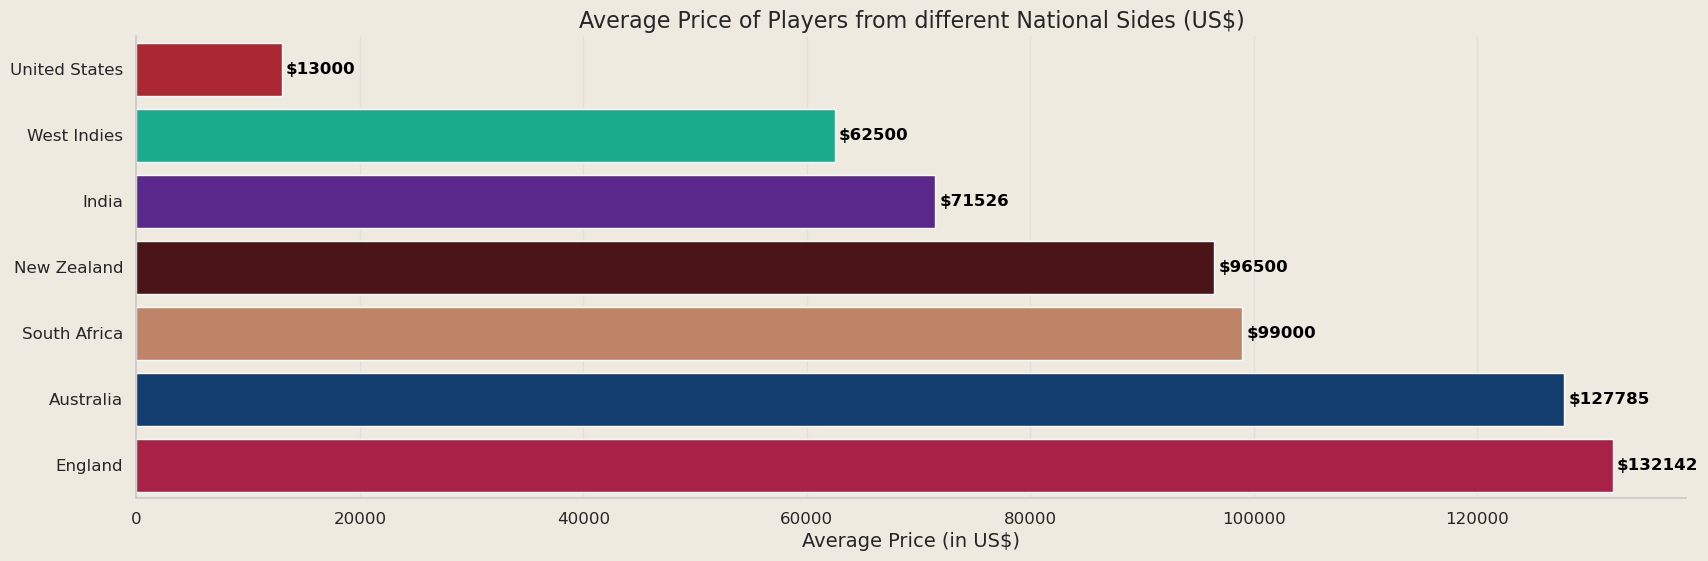

In [11]:
average_price_per_national_side = auction_df.groupby('National Side')['Price (US$)'].mean().reset_index().sort_values(by='Price (US$)', ascending=True)
average_price_per_national_side['Price (US$)'] = average_price_per_national_side['Price (US$)'].astype(int)
average_price_per_national_side['Price (US$) Label'] = average_price_per_national_side['Price (US$)'].apply(lambda x: f'${x}')

fig = plt.figure(figsize=(20, 6))
ax = sns.barplot(y='National Side', x='Price (US$)', data=average_price_per_national_side, palette=national_side_palettes)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=12, color='black', padding=3, weight='bold', labels=average_price_per_national_side['Price (US$) Label'])
plt.title('Average Price of Players from different National Sides (US$)', fontsize=16)    
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('')
plt.xlabel('Average Price (in US$)', fontsize=14)
plt.show();

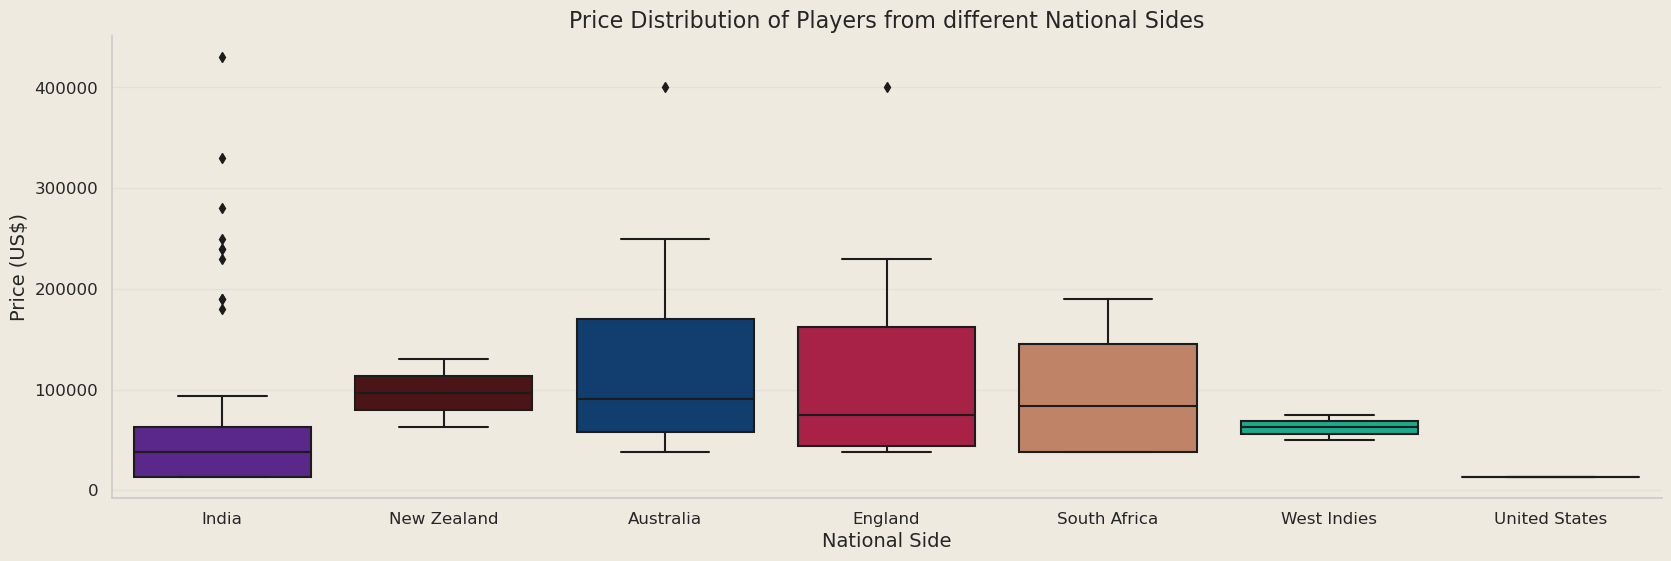

In [12]:
fig = plt.figure(figsize=(20, 6))

ax = sns.boxplot(x='National Side', y='Price (US$)', data=auction_df, palette=national_side_palettes)
plt.title('Price Distribution of Players from different National Sides', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Price (US$)', fontsize=14)
plt.xlabel('National Side', fontsize=14)
plt.show();

<div class="alert alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">

📌&nbsp;<u><b>Insights:</b></u>
 
<li>Players from 7 national sides will be part of first WPL.</li><br>
<li>Indian players are the most in number(57) followed by Australian(14) and England(7).</li><br>
<li>Average price for English players is the highest followed by Australians.</li><br>
<li>Highest bid was made for Indian Player</li><br>
</div>

<br>

<a href="#top" role="button" aria-pressed="true" >⬆️ Back to Table of Contents ⬆️</a>

### <center>Age Group Wise Analysis</center>

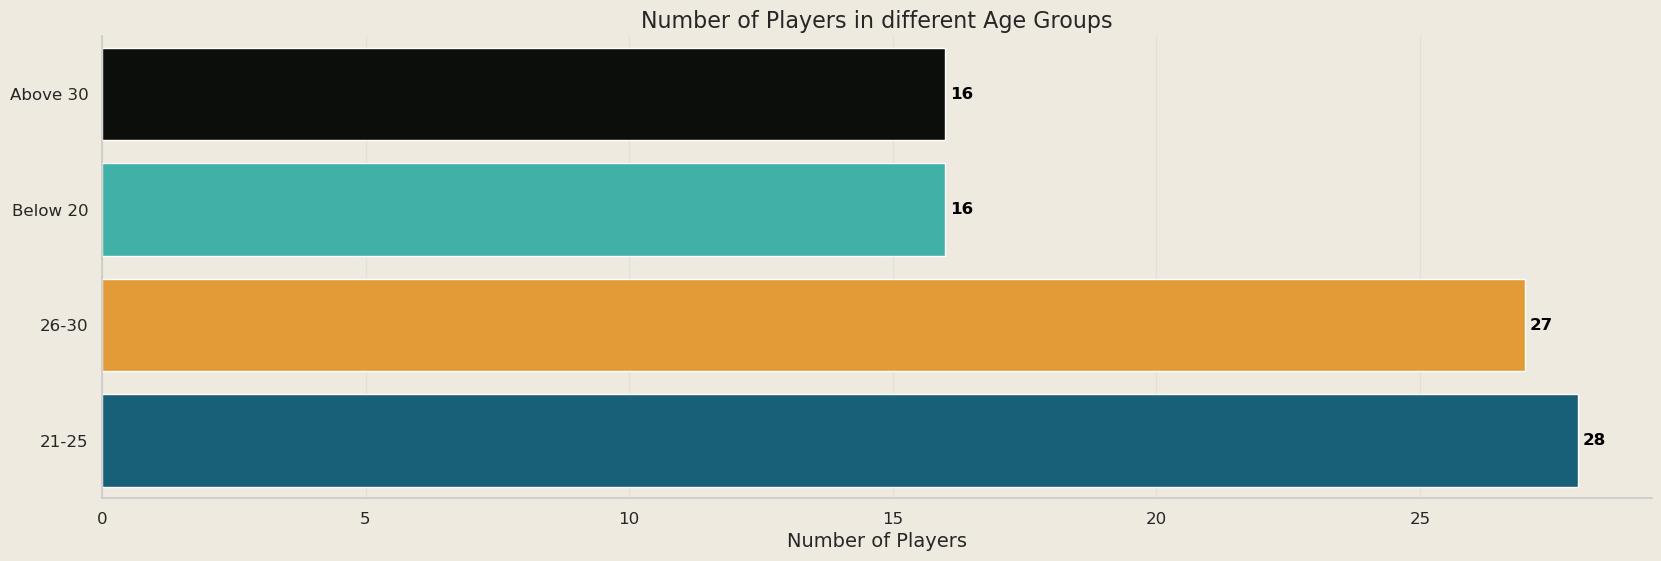

In [13]:
age_group_palette = ['#0c0f0a', '#2ec4b6', '#ff9f1c', '#086788']

def player_age_age_group(age):
    if age <= 20:
        return 'Below 20'    
    elif age <= 25:
        return '21-25'
    elif age > 25 and age <= 30:
        return '26-30'
    else:
        return 'Above 30'

auction_df['Age Group'] = auction_df['Age(Years)'].apply(player_age_age_group)
players_count_by_age_group = auction_df.groupby('Age Group')['Player'].count().reset_index().sort_values(by='Player', ascending=True)
age_group_palettes = {
    group:color for group, color in zip(players_count_by_age_group['Age Group'].values, age_group_palette)
}

fig = plt.figure(figsize=(20, 6))
ax = sns.barplot(y='Age Group', x='Player', data=players_count_by_age_group, palette=age_group_palettes)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=12, color='black', padding=3, weight='bold')
plt.title('Number of Players in different Age Groups', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('')
plt.xlabel('Number of Players', fontsize=14)
plt.show();    

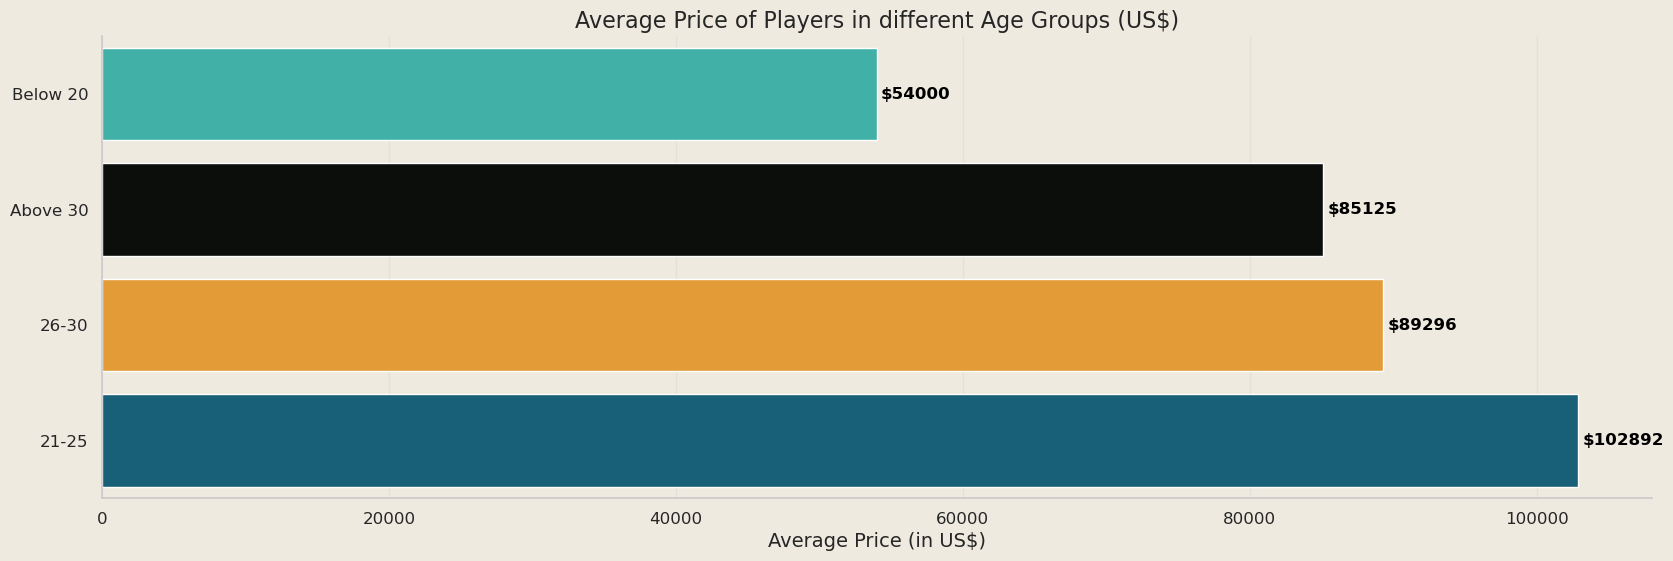

In [14]:
average_price_by_age_group = auction_df.groupby('Age Group')['Price (US$)'].mean().reset_index().sort_values(by='Price (US$)', ascending=True)
average_price_by_age_group['Price (US$)'] = average_price_by_age_group['Price (US$)'].astype(int)
average_price_by_age_group['Price (US$) Label'] = average_price_by_age_group['Price (US$)'].apply(lambda x: f'${x}')

fig = plt.figure(figsize=(20, 6))
ax = sns.barplot(y='Age Group', x='Price (US$)', data=average_price_by_age_group, palette=age_group_palettes)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=12, color='black', padding=3, weight='bold', labels=average_price_by_age_group['Price (US$) Label'])
plt.title('Average Price of Players in different Age Groups (US$)', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('')
plt.xlabel('Average Price (in US$)', fontsize=14)
plt.show();    

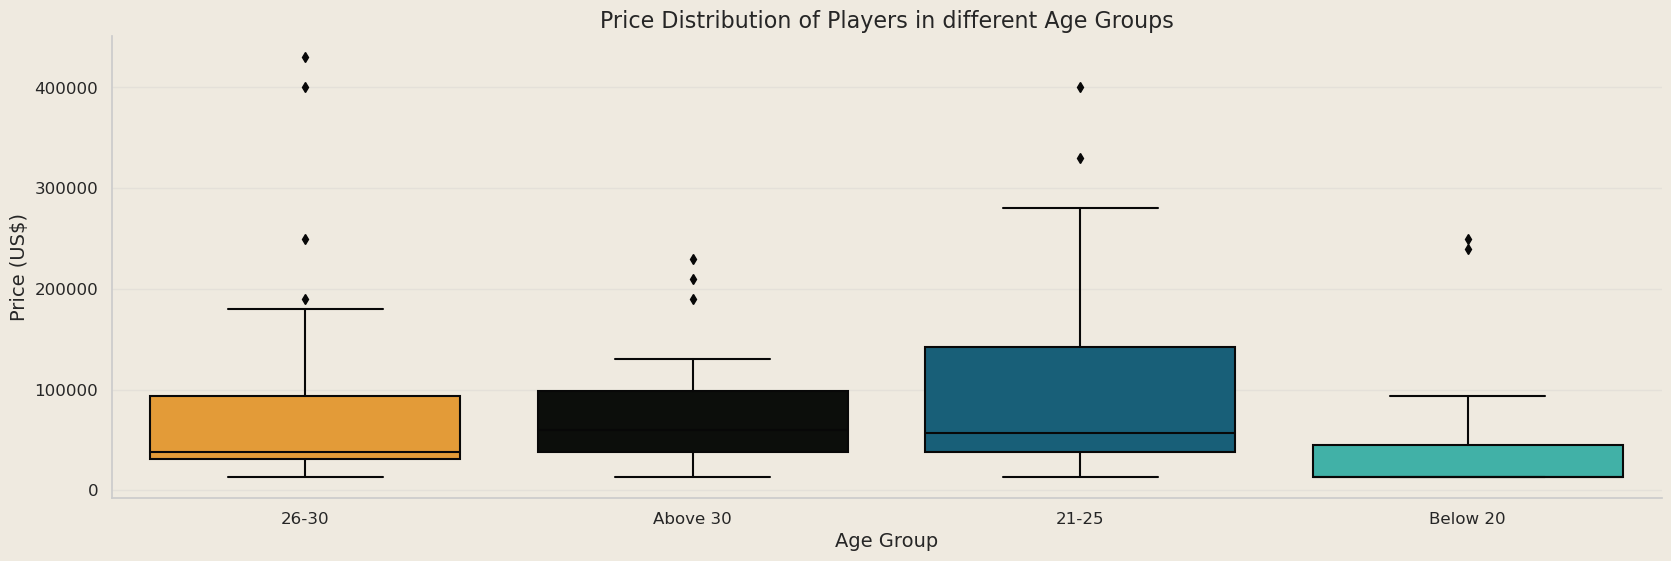

In [15]:
fig = plt.figure(figsize=(20, 6))
ax = sns.boxplot(x='Age Group', y='Price (US$)', data=auction_df, palette=age_group_palettes)
plt.title('Price Distribution of Players in different Age Groups', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Price (US$)', fontsize=14)
plt.xlabel('Age Group', fontsize=14)
plt.show();

<div class="alert alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">

📌&nbsp;<u><b>Insights:</b></u>
 
<li>Most of the players are in the age group of 21-25. Above 30 and below 20 both has only 16 players each.</li><br>
<li>Players in the age group of 21-25 are the most expensive and players below 20 are the least expensive.</li><br>
<li>Highest bids was made for a player in the age group of 26-30.</li><br>
</div>

<br>

<a href="#top" role="button" aria-pressed="true" >⬆️ Back to Table of Contents ⬆️</a>

### <center>Player Role Analysis</center>

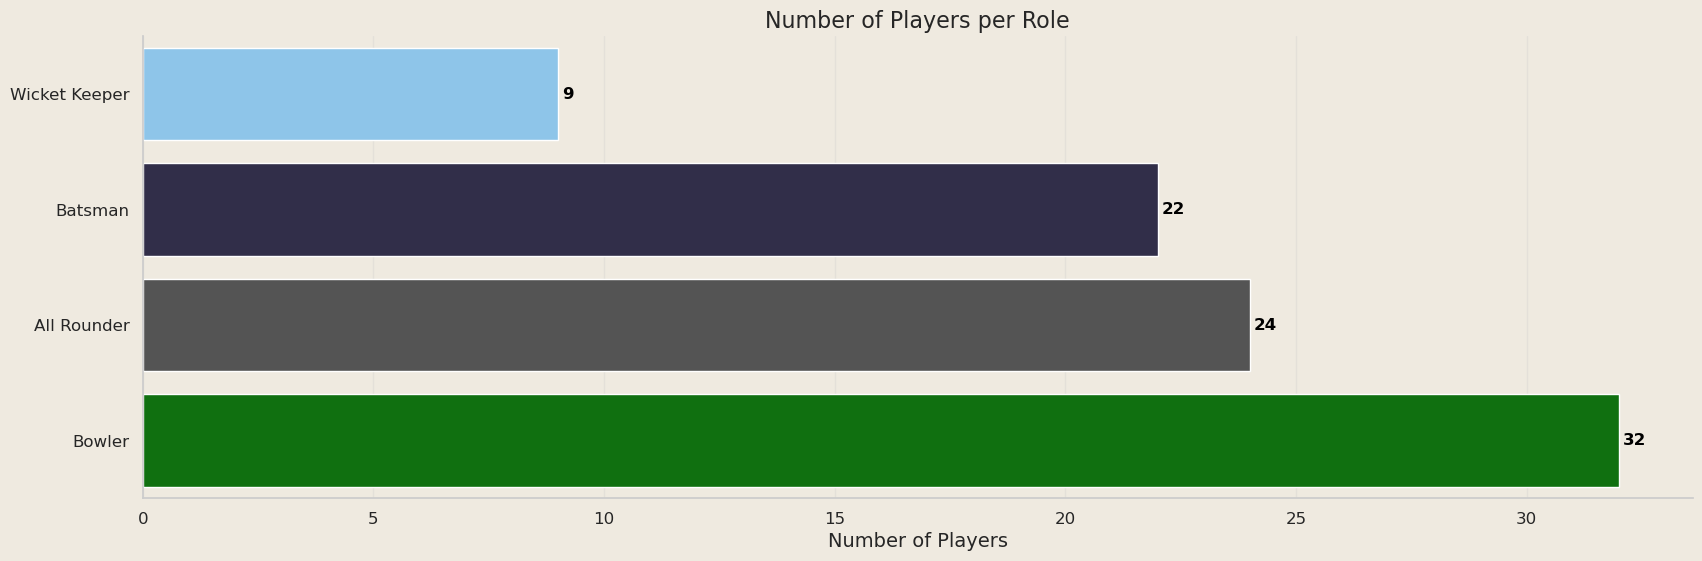

In [16]:
role_palette = ['#7fc8f8', '#2e294e', '#545454', '#008000']

players_per_role = players_info_df.groupby('Role')['Player'].count().reset_index().sort_values(by='Player', ascending=True)
role_palettes = {
    role:color for role, color in zip(players_per_role['Role'].values, role_palette)
}

fig = plt.figure(figsize=(20, 6))
ax = sns.barplot(y='Role', x='Player', data=players_per_role, palette=role_palettes)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=12, color='black', padding=3, weight='bold')
plt.title('Number of Players per Role', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('')
plt.xlabel('Number of Players', fontsize=14)
plt.show();   

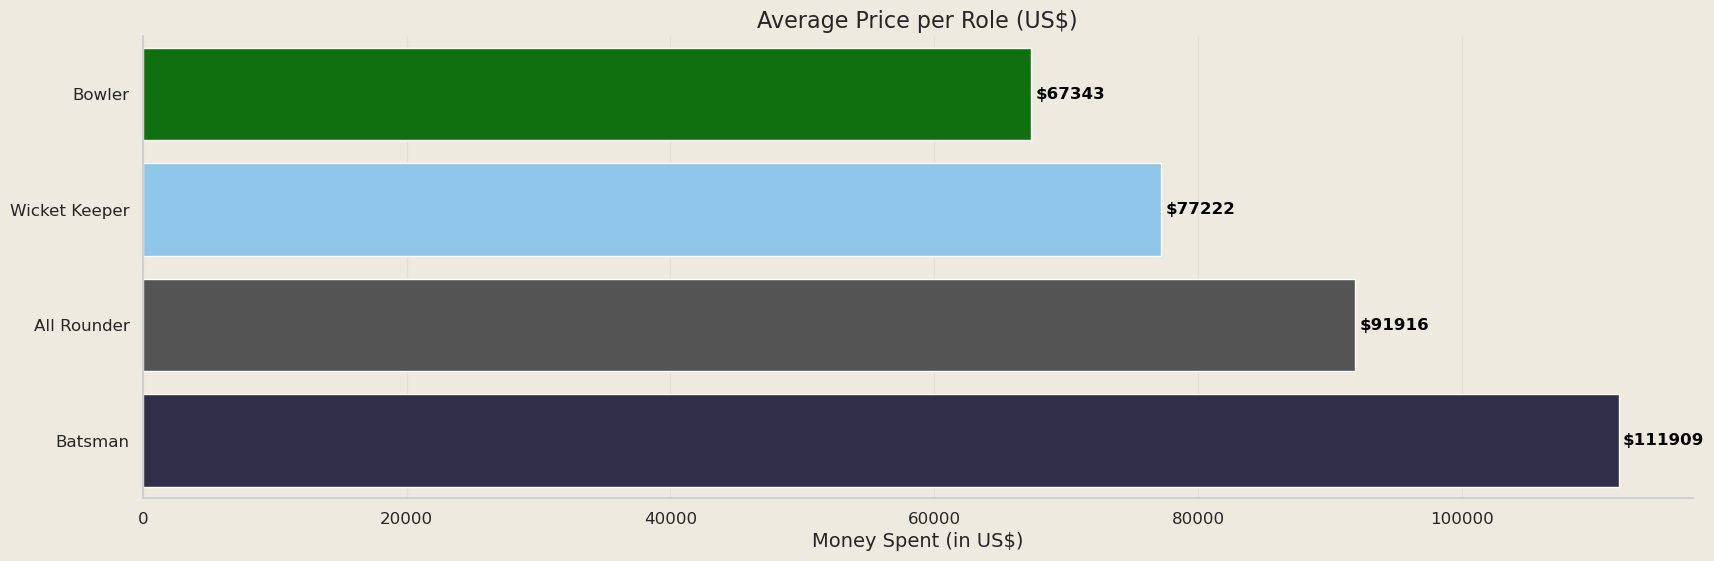

In [17]:
average_price_per_role = auction_df.groupby('Role')['Price (US$)'].mean().reset_index().sort_values(by='Price (US$)', ascending=True)
average_price_per_role['Price (US$)'] = average_price_per_role['Price (US$)'].astype(int)
average_price_per_role['Price (US$) Label'] = average_price_per_role['Price (US$)'].apply(lambda x: f'${x}')

fig = plt.figure(figsize=(20, 6))
ax = sns.barplot(y='Role', x='Price (US$)', data=average_price_per_role, palette=role_palettes)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=12, color='black', padding=3, weight='bold', labels=average_price_per_role['Price (US$) Label'])
plt.title('Average Price per Role (US$)', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('')
plt.xlabel('Money Spent (in US$)', fontsize=14)
plt.show();   

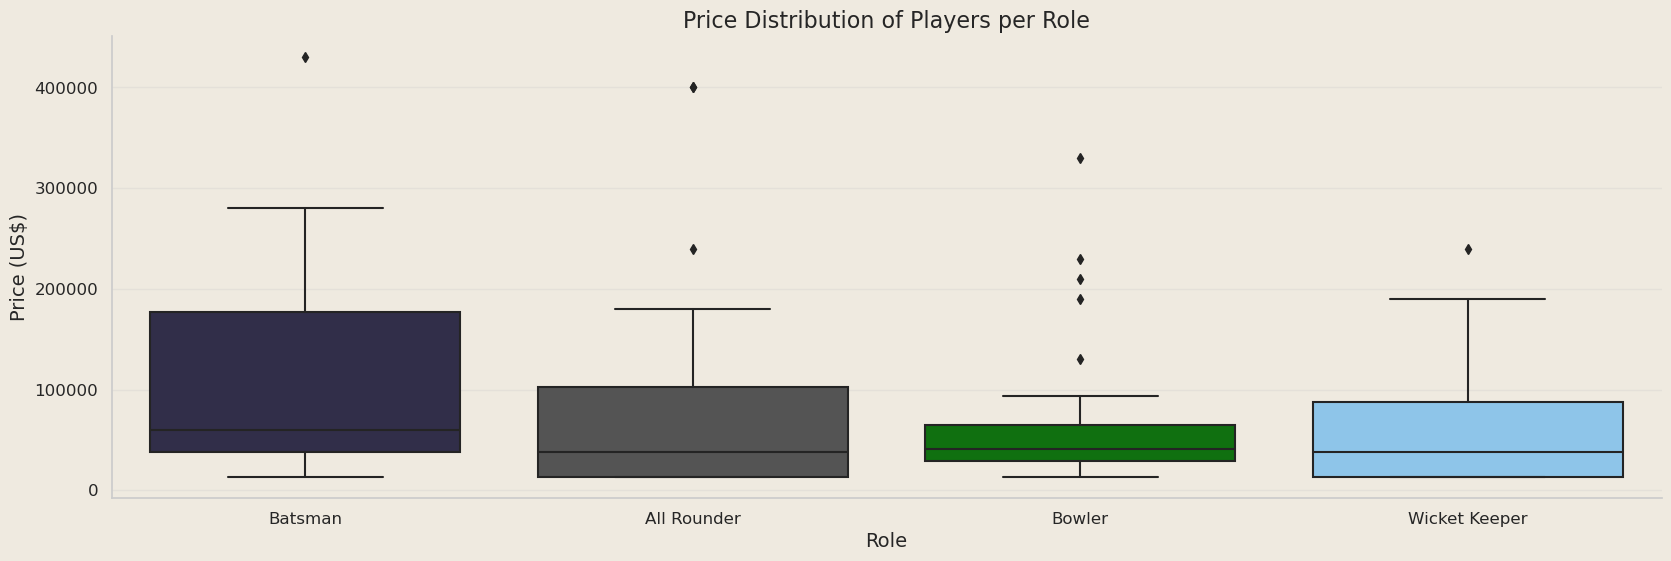

In [18]:
fig = plt.figure(figsize=(20, 6))

ax = sns.boxplot(x='Role', y='Price (US$)', data=auction_df, palette=role_palettes)
plt.title('Price Distribution of Players per Role', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Price (US$)', fontsize=14)
plt.xlabel('Role', fontsize=14)
plt.show();

<div class="alert alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">

📌&nbsp;<u><b>Insights:</b></u>
 
<li>Number of bowlers are the most(32) followed by all-rounders(24) and batters(22).</li><br>
<li>Average price of batters is the highest(&#36;111909) followed by all-rounders.</li><br>
<li>Highest bid was made for a batsman.</li><br>
</div>

<br>

<a href="#top" role="button" aria-pressed="true" >⬆️ Back to Table of Contents ⬆️</a>

### <center>Top 5 Costliest Players</center>

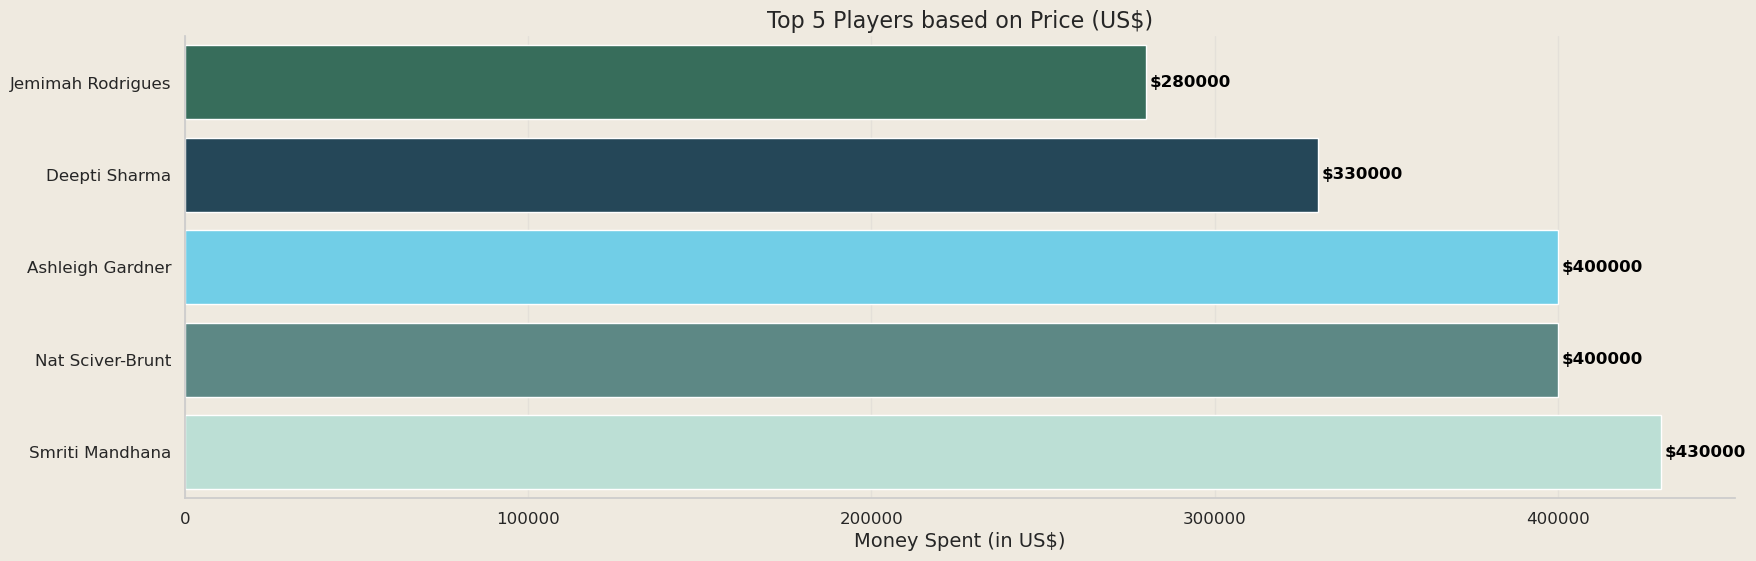

In [19]:
fig = plt.figure(figsize=(20, 6))
auction_df['Price (US$) Label'] = auction_df['Price (US$)'].apply(lambda x: f'${x}')
top_5_players_by_price = auction_df.sort_values(by='Price (US$)', ascending=False).head(5)
ax = sns.barplot(y='Player', x='Price (US$)', data=top_5_players_by_price.sort_values(by='Price (US$)', ascending=True))
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=12, color='black', padding=3, weight='bold', labels=top_5_players_by_price.sort_values(by='Price (US$)', ascending=True)['Price (US$) Label'])
plt.title('Top 5 Players based on Price (US$)', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('')
plt.xlabel('Money Spent (in US$)', fontsize=14)
plt.show();    

<div class="alert alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">

📌&nbsp;<u><b>Insights:</b></u>

<li>Smriti Mandhana is the most expensive player in this auction.</li><br>
<li>Out of top 5, 3 are Indian players. Other two are from Australia and England.</li><br>
<li>Out of top 5, 2 each are batters and all-rounders and 1 is a bowler.</li><br>
</div>

<br>

<a href="#top" role="button" aria-pressed="true" >⬆️ Back to Table of Contents ⬆️</a>

<a id="4"></a>
# <center>Team Wise Level Analysis</center>

### <center>Team and Player Role Analysis</center>

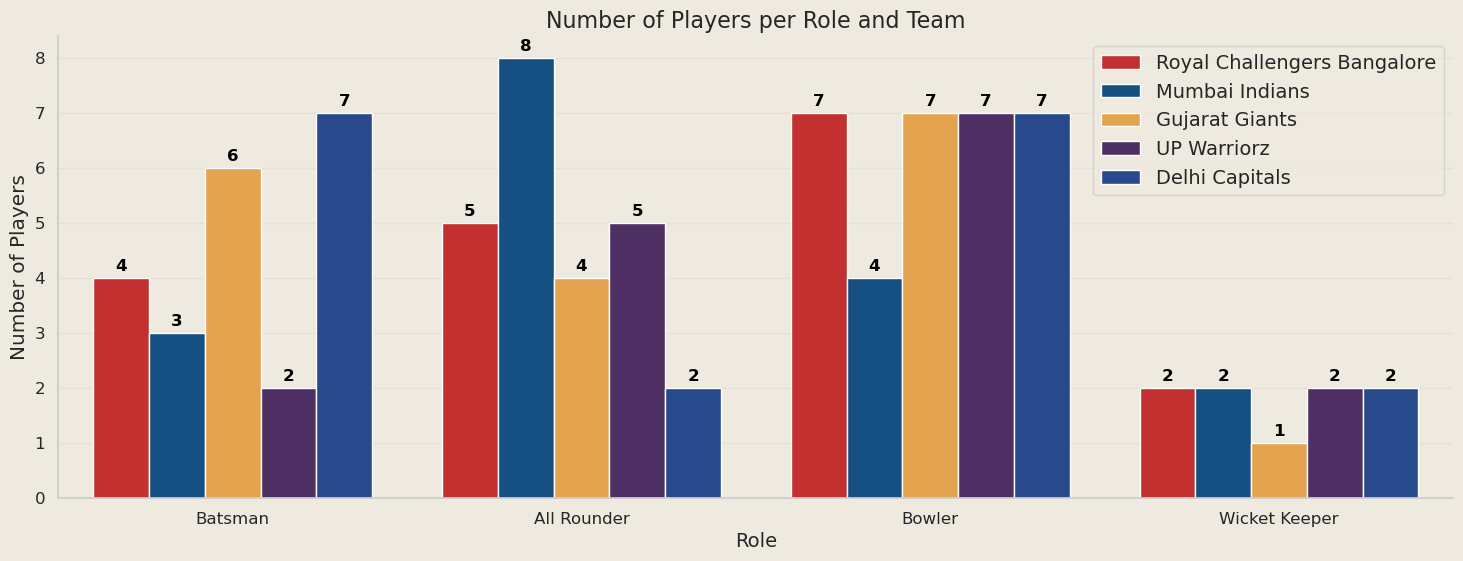

In [20]:
fig = plt.figure(figsize=(18, 6))

ax = sns.countplot(x='Role', data=auction_df, hue='Team', palette=team_specific_palette)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=12, color='black', padding=3, weight='bold')
ax.legend(loc='upper right', fontsize=14)
plt.title('Number of Players per Role and Team', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Number of Players')
plt.xlabel('Role', fontsize=14)    
plt.show();

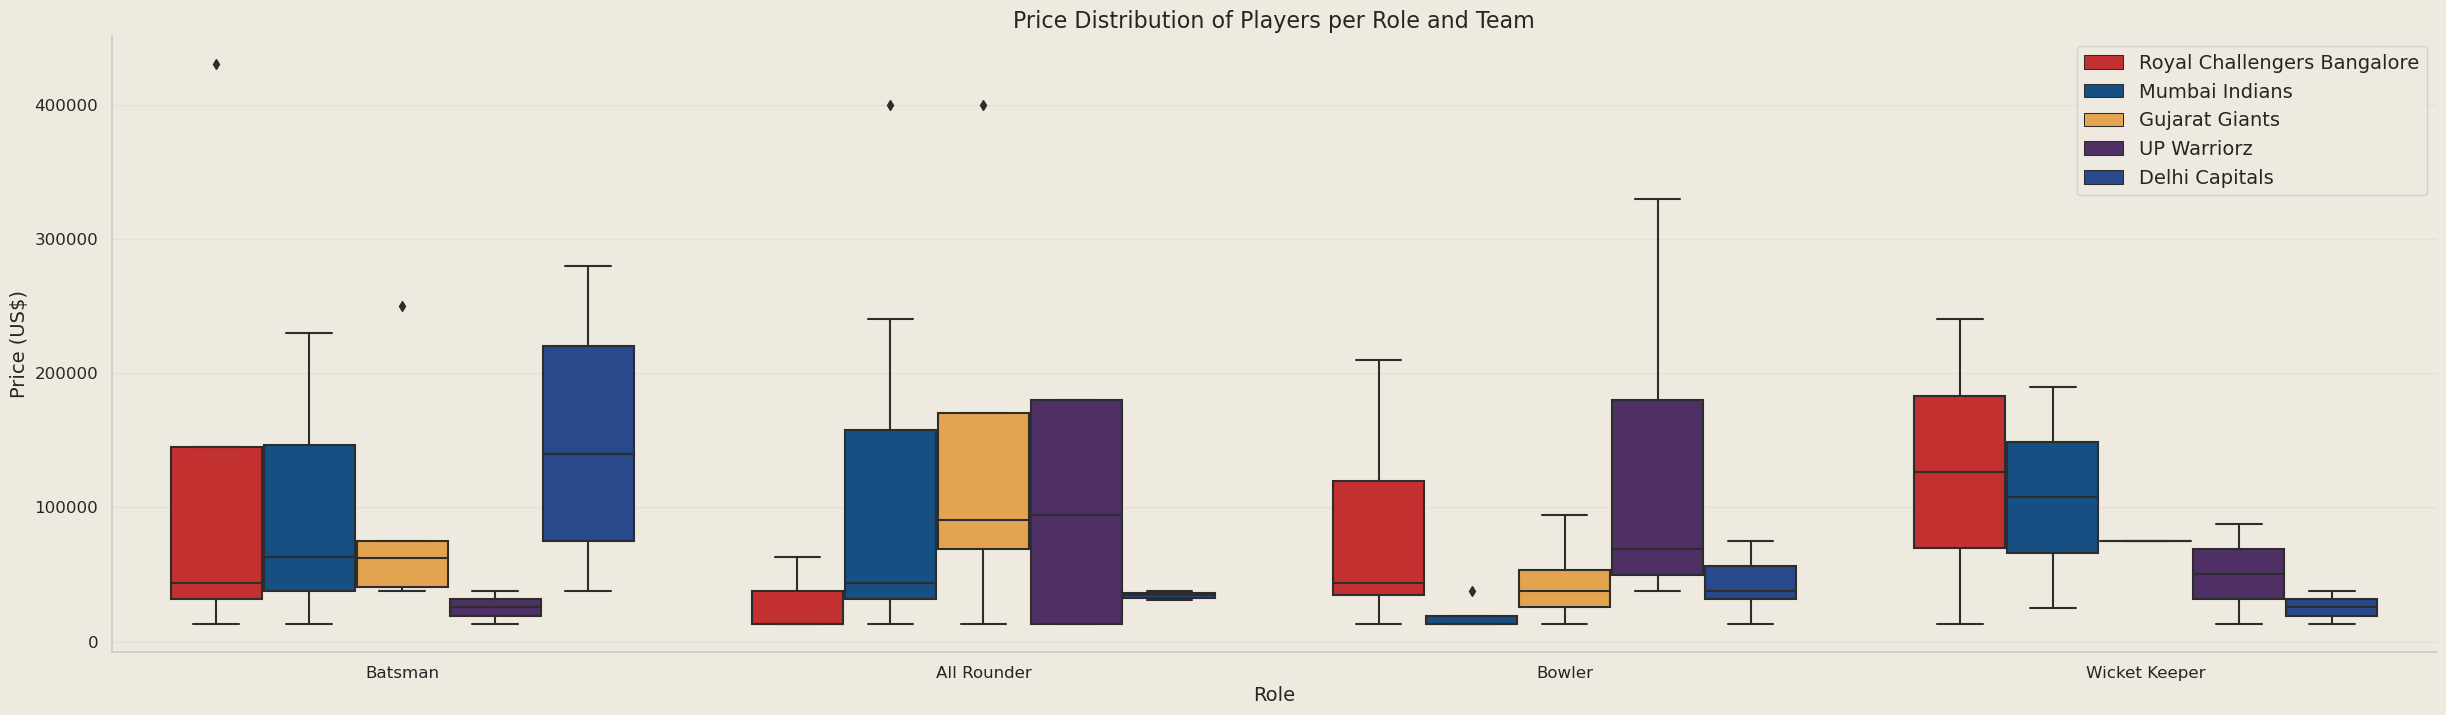

In [21]:
fig = plt.figure(figsize=(30, 8))
ax = sns.boxplot(x='Role', y='Price (US$)', data=auction_df, hue='Team', palette=team_specific_palette)
ax.legend(loc='upper right', fontsize=14)
plt.title('Price Distribution of Players per Role and Team', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Price (US$)', fontsize=14)
plt.xlabel('Role', fontsize=14)
plt.show();

<div class="alert alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">

📌&nbsp;<u><b>Insights:</b></u>

<li>Mumbai Indians has the most number of all rounders.</li><br>
<li>Delhi Capitals has the most number of batters and bowlers. They seems to rely on specialist players instead of all-rounders. Delhi capitals has spent the least money on all-rounders.</li><br>
<li>UP Warriorz has spend more on All rounders and bowlers but least on batsmen.</li>
</div>

<br>

<a href="#top" role="button" aria-pressed="true" >⬆️ Back to Table of Contents ⬆️</a>

### <center>Team and Age Group Analysis</center>

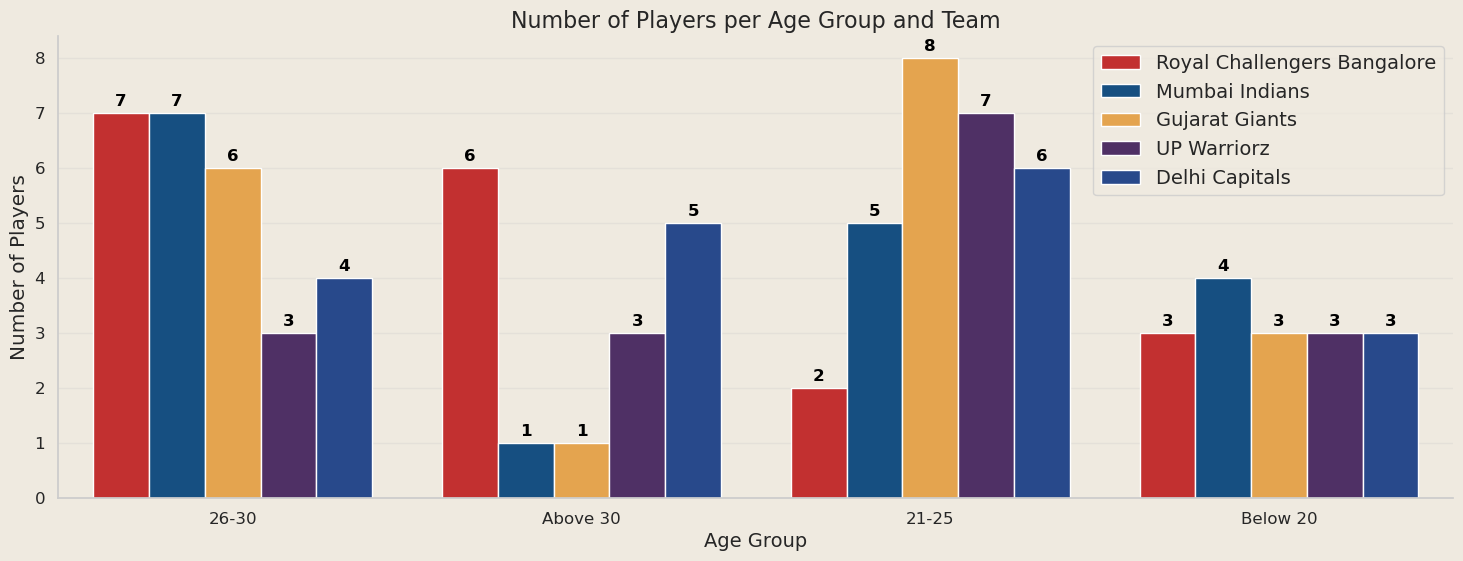

In [22]:
fig = plt.figure(figsize=(18, 6))

ax = sns.countplot(x='Age Group', data=auction_df, hue='Team', palette=team_specific_palette)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=12, color='black', padding=3, weight='bold')
ax.legend(loc='upper right', fontsize=14)
plt.title('Number of Players per Age Group and Team', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Number of Players')
plt.xlabel('Age Group', fontsize=14)
plt.show();    

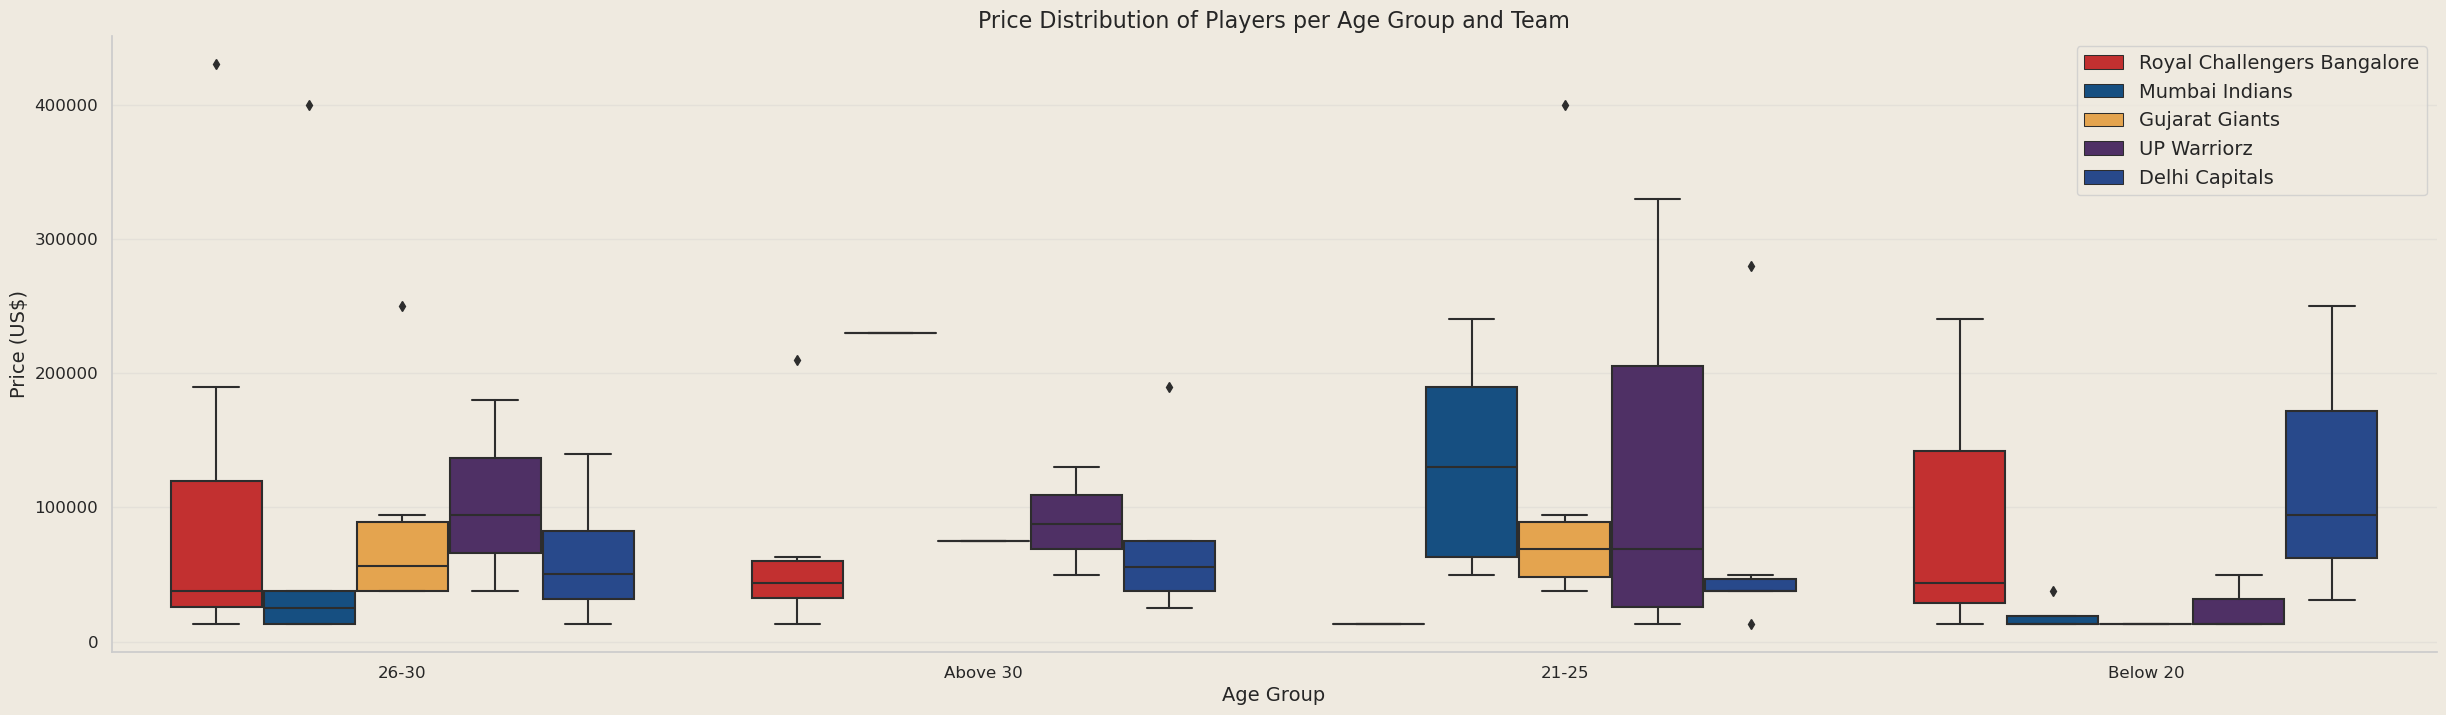

In [23]:
fig = plt.figure(figsize=(30, 8))
ax = sns.boxplot(x='Age Group', y='Price (US$)', data=auction_df, hue='Team', palette=team_specific_palette)
ax.legend(loc='upper right', fontsize=14)
plt.title('Price Distribution of Players per Age Group and Team', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Price (US$)', fontsize=14)
plt.xlabel('Age Group', fontsize=14)
plt.show();

<div class="alert alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">

📌&nbsp;<u><b>Insights:</b></u>

<li>13 out of 18 players for RCB are above 26 years. This is the most among all the teams</li><br>
<li>RCB and Delhi Capitals spent the most on players below 20 years.</li><br>
<li>Mumbai Indians and Gujarat Giants has only 1 player each above 30 years.</li><br>
</div>

<br>

<a href="#top" role="button" aria-pressed="true" >⬆️ Back to Table of Contents ⬆️</a>

### <center>Team and Bowling Pace Analysis</center>

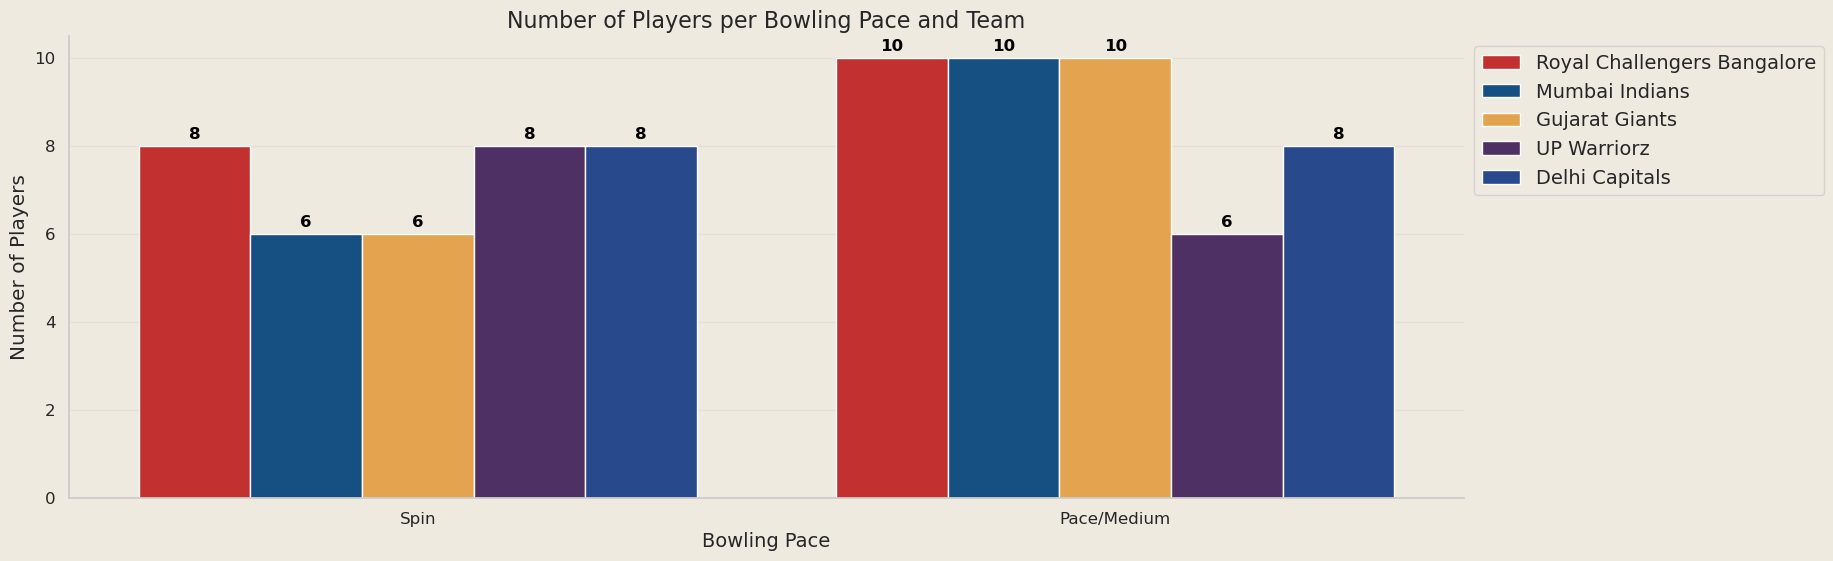

In [24]:
def bowling_to_bowling_pace(bowling_style):
    if bowling_style == '-':
        return None
    elif 'medium' in bowling_style or 'fast' in bowling_style:
        return 'Pace/Medium'
    else:
        return 'Spin'

auction_df['Bowling Pace'] = auction_df['Bowling'].apply(bowling_to_bowling_pace)


fig = plt.figure(figsize=(18, 6))
ax = sns.countplot(x='Bowling Pace', data=auction_df, hue='Team', palette=team_specific_palette)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=12, color='black', padding=3, weight='bold')
ax.legend(loc='upper left', fontsize=14, bbox_to_anchor=(1, 1))
plt.title('Number of Players per Bowling Pace and Team', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Number of Players')
plt.xlabel('Bowling Pace', fontsize=14)
plt.show();    

### <center>Team and National Side Analysis</center>

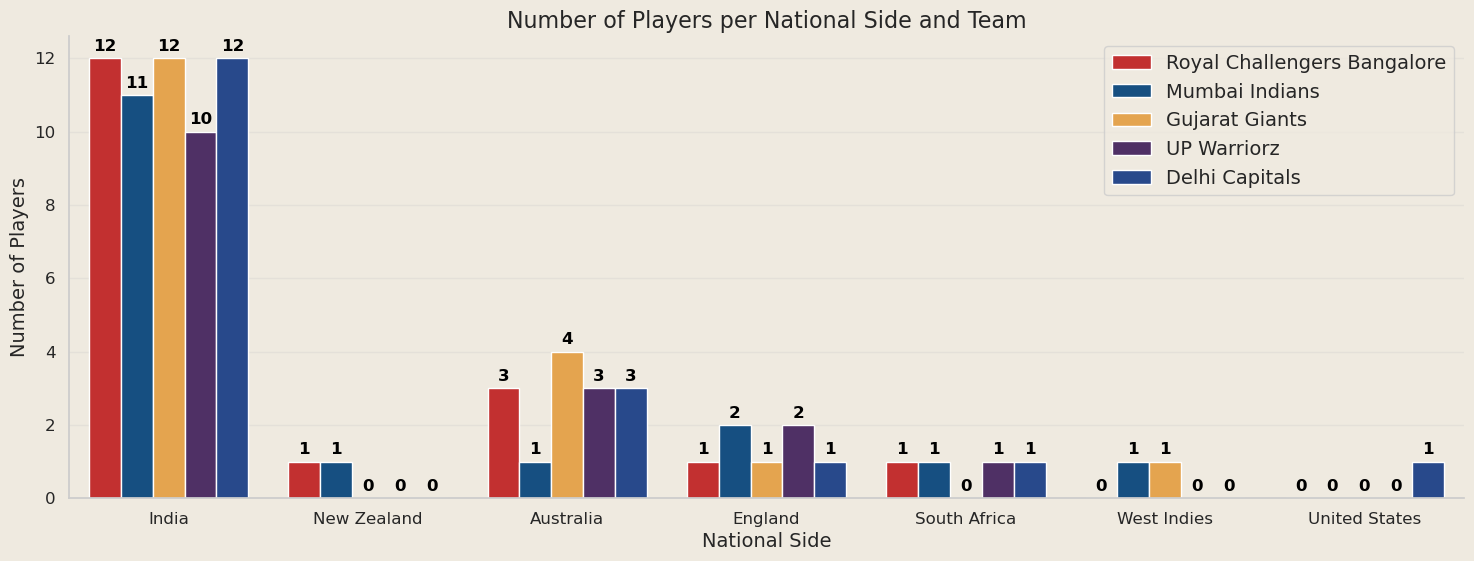

In [25]:
fig = plt.figure(figsize=(18, 6))
ax = sns.countplot(x='National Side', data=auction_df, hue='Team', palette=team_specific_palette)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=12, color='black', padding=3, weight='bold')
ax.legend(loc='upper right', fontsize=14)
plt.title('Number of Players per National Side and Team', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Number of Players', fontsize=14)
plt.xlabel('National Side', fontsize=14)
plt.show();    

<a href="#top" role="button" aria-pressed="true" >⬆️ Back to Table of Contents ⬆️</a>

<div class="alert alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    
### <center>Thanks for checking out this notebook 🙏</center>
### <center>Please share your feedback and upvote if you find this notebook useful 👍</center>
### <center>Checkout my other notebooks and datasets on Cricket</center>

<center><a href="https://www.kaggle.com/code/pardeep19singh/virat-kohli-ipl-career-analysis" role="button" aria-pressed="true" >Virat Kohli IPL Career Analysis 🏏</a></center>
<center><a href="https://www.kaggle.com/code/pardeep19singh/men-s-hundred-season-level-analysis" role="button" aria-pressed="true" >The Hundred Mens League Season Level Analysis 🏏</a></center>
<center><a href="https://www.kaggle.com/code/pardeep19singh/the-hundred-women-s-season-level-analysis" role="button" aria-pressed="true" >The Hundred Women's Season Level Analysis 🏏</a></center>
<center><a href="https://www.kaggle.com/datasets/pardeep19singh/womens-premier-leaguewpl-auction-2023" role="button" aria-pressed="true" >Women's Premier League Auction (2023) Dataset 🏏</a></center><center><a href="https://www.kaggle.com/datasets/pardeep19singh/the-hundred-mens-2021-2022" role="button" aria-pressed="true" >The Hundred Men's Cricket (2021-2022) Dataset 🏏</a></center>
<center><a href="https://www.kaggle.com/datasets/pardeep19singh/the-hundred-womens-cricket-2021-2022" role="button" aria-pressed="true" >The Hundred Women's Cricket (2021-2022) Dataset 🏏</a></center>